In [1]:
import pandas as pd
import missingno as msno
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sb.set_style("whitegrid")

# Read data

In [2]:
project_dir = "data/features/"

df_lex1_simp = pd.read_csv(project_dir + "Lexis-Sin-EN.csv")
df_lex1_comp = pd.read_csv(project_dir + "Lexis-Sin-EN_components.csv")
df_lex2_simp = pd.read_csv(project_dir + "Lexis-EN.csv")
df_lex2_comp = pd.read_csv(project_dir + "Lexis-EN_components.csv")
df_syn1_simp = pd.read_csv(project_dir + "Syntax-Sin-JP-SP-SW.csv")
df_syn1_comp = pd.read_csv(project_dir + "Syntax-Sin-JP-SP-SW_components.csv")
df_syn2_simp = pd.read_csv(project_dir + "Syntax-JP-SP-SW.csv")
df_syn2_comp = pd.read_csv(project_dir + "Syntax-JP-SP-SW_components.csv")

# Merge data

In [3]:
df_lex_simp = pd.concat([df_lex1_simp, df_lex2_simp])
df_lex_comp = pd.concat([df_lex1_comp, df_lex2_comp])
df_syn_simp = pd.concat([df_syn1_simp, df_syn2_simp])
df_syn_comp = pd.concat([df_syn1_comp, df_syn2_comp])

len(df_lex_simp), len(df_syn_simp)

(2365, 2365)

# Sort

In [4]:
df_lex_simp.sort_values("filename", inplace=True)
df_lex_comp.sort_values("filename", inplace=True)
df_syn_simp.sort_values("filename", inplace=True)
df_syn_comp.sort_values("filename", inplace=True)

# Target: Idioma

In [5]:
df_lex_simp["idioma"] = df_lex_simp["filename"].str[:2]
df_lex_comp["idioma"] = df_lex_comp["filename"].str[:2]
df_syn_simp["idioma"] = df_syn_simp["filename"].str[:2]
df_syn_comp["idioma"] = df_syn_comp["filename"].str[:2]

df_lex_simp["idioma"] = df_lex_simp["idioma"].replace({"LO": "EN", "CA": "EN"})
df_lex_comp["idioma"] = df_lex_comp["idioma"].replace({"LO": "EN", "CA": "EN"})
df_syn_simp["idioma"] = df_syn_simp["idioma"].replace({"LO": "EN", "CA": "EN"})
df_syn_comp["idioma"] = df_syn_comp["idioma"].replace({"LO": "EN", "CA": "EN"})

In [6]:
df_lex_simp["idioma"].value_counts()

EN    229
CH    211
JP    202
BG    201
SW    200
GE    200
GR    195
FR    189
DU    187
IT    187
PL    183
SP    181
Name: idioma, dtype: int64

# Parte de la entrevista

In [7]:
df_lex_simp["filename"].str[-6:-4].value_counts()

P1    618
P3    617
P2    598
12    526
_1      2
_3      1
p2      1
0P      1
_2      1
Name: filename, dtype: int64

In [8]:
df_lex_simp["parte"] = df_lex_simp["filename"].str[-6:-4]
df_lex_comp["parte"] = df_lex_comp["filename"].str[-6:-4]
df_syn_simp["parte"] = df_syn_simp["filename"].str[-6:-4]
df_syn_comp["parte"] = df_syn_comp["filename"].str[-6:-4]

In [9]:
pd.crosstab(df_lex_simp["parte"], df_lex_simp["idioma"], margins=True)

idioma   BG   CH   DU   EN   FR   GE   GR   IT   JP   PL   SP   SW   All
parte                                                                   
0P        1    0    0    0    0    0    0    0    0    0    0    0     1
12       50   52   47    0   47   50   49   44   50   44   43   50   526
P1       50   53   47   76   48   50   48   50   50   48   48   50   618
P2       50   53   47   71   47   50   49   43   51   44   43   50   598
P3       50   53   46   77   47   50   49   50   51   47   47   50   617
_1        0    0    0    2    0    0    0    0    0    0    0    0     2
_2        0    0    0    1    0    0    0    0    0    0    0    0     1
_3        0    0    0    1    0    0    0    0    0    0    0    0     1
p2        0    0    0    1    0    0    0    0    0    0    0    0     1
All     201  211  187  229  189  200  195  187  202  183  181  200  2365

In [10]:
#replacements = {"12":"P1P2", "_1":"P1", "_2":"P2", "_3":"P3", "0P": "P1", "p2": "P2"}
#df_lex_simp["parte"] = df_lex_simp["parte"].replace(replacements)
#df_lex_comp["parte"] = df_lex_comp["parte"].replace(replacements)
#df_syn_simp["parte"] = df_syn_simp["parte"].replace(replacements)
#df_syn_comp["parte"] = df_syn_comp["parte"].replace(replacements)

#df_lex_simp["parte"].value_counts()

In [11]:
df_lex_simp = df_lex_simp[df_lex_simp["parte"].isin(["P1", "P2", "P3"])]
df_lex_comp = df_lex_comp[df_lex_comp["parte"].isin(["P1", "P2", "P3"])]
df_syn_simp = df_syn_simp[df_syn_simp["parte"].isin(["P1", "P2", "P3"])]
df_syn_comp = df_syn_comp[df_syn_comp["parte"].isin(["P1", "P2", "P3"])]

In [12]:
pd.crosstab(df_lex_simp["parte"], df_lex_simp["idioma"], margins=True)

idioma   BG   CH   DU   EN   FR   GE   GR   IT   JP   PL   SP   SW   All
parte                                                                   
P1       50   53   47   76   48   50   48   50   50   48   48   50   618
P2       50   53   47   71   47   50   49   43   51   44   43   50   598
P3       50   53   46   77   47   50   49   50   51   47   47   50   617
All     150  159  140  224  142  150  146  143  152  139  138  150  1833

# Save to CSV

In [13]:
df_lex_simp.to_csv("data/lexis.csv",       index=False)
df_lex_comp.to_csv("data/lexis_comp.csv",  index=False)
df_syn_simp.to_csv("data/syntax.csv",      index=False)
df_syn_comp.to_csv("data/syntax_comp.csv", index=False)

# Datos lexicos

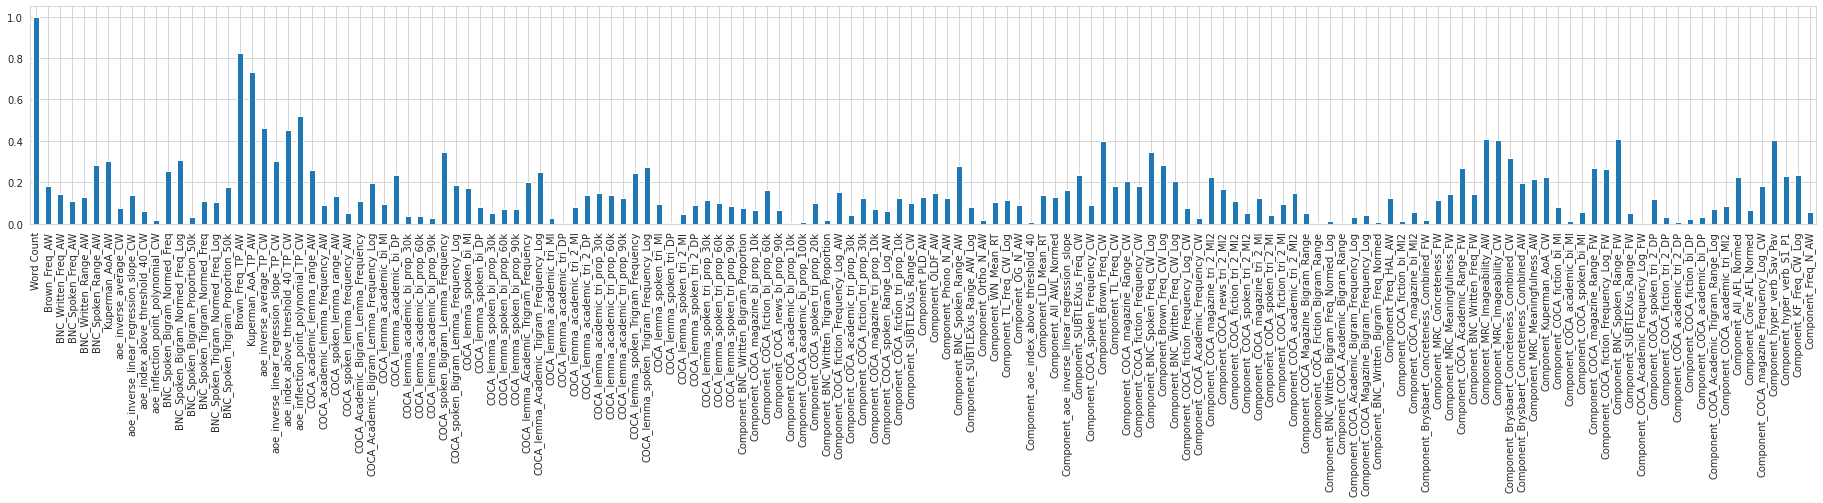

In [7]:
plt.figure(figsize=(32, 4))
df_lex_simp.corr()["Word Count"].abs().plot.bar();

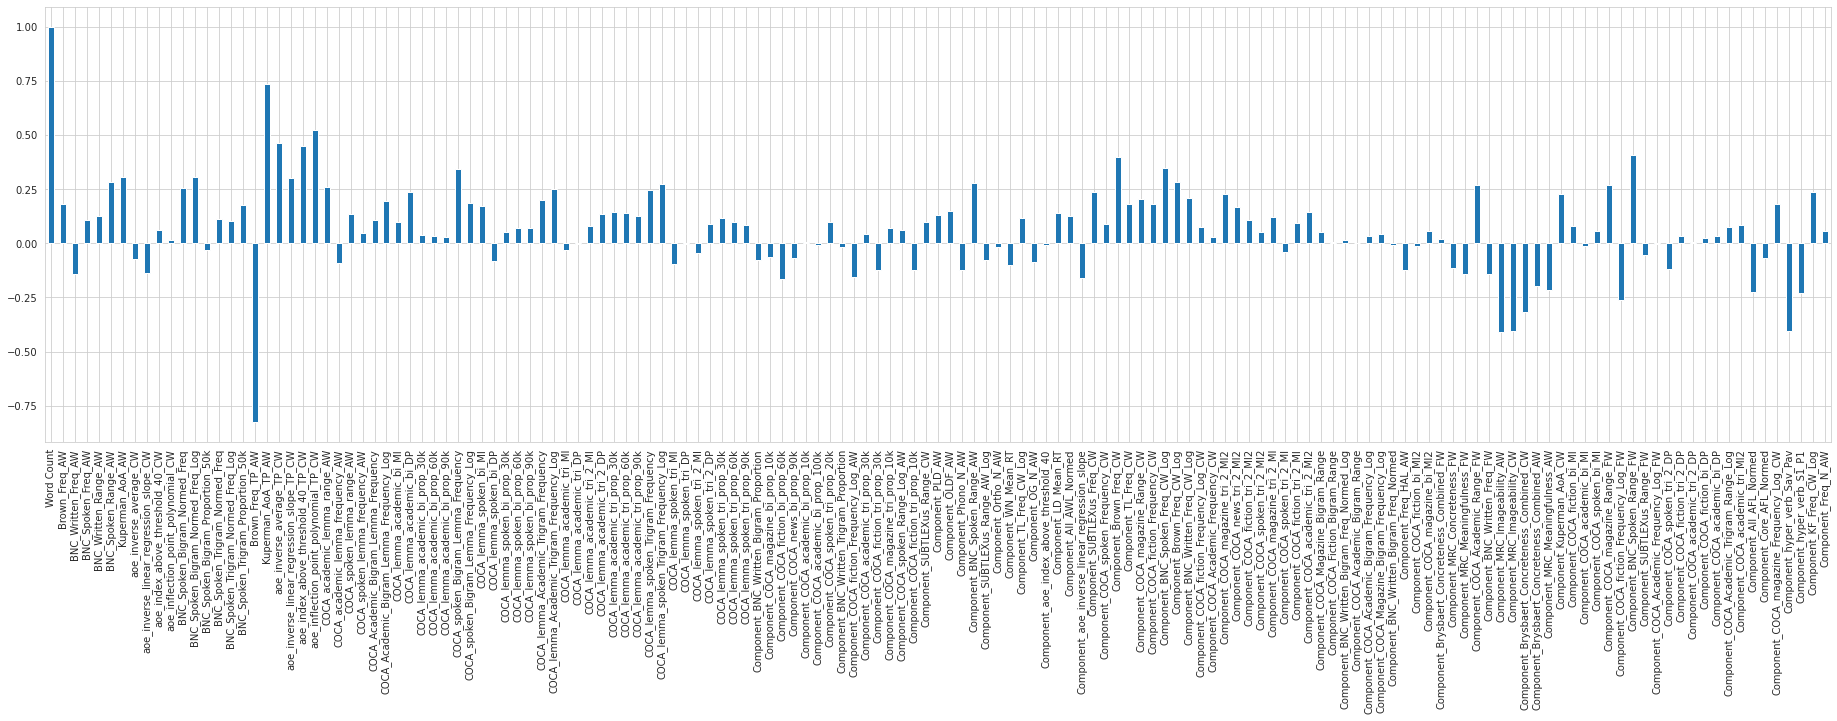

In [11]:
plt.figure(figsize=(32, 8))
df_lex_simp.corr()["Word Count"].plot.bar();

In [17]:
x.columns

Index(['Word Count', 'Brown_Freq_AW', 'BNC_Written_Freq_AW',
       'BNC_Spoken_Freq_AW', 'BNC_Written_Range_AW', 'BNC_Spoken_Range_AW',
       'Kuperman_AoA_AW', 'aoe_inverse_average_CW',
       'aoe_inverse_linear_regression_slope_CW',
       'aoe_index_above_threshold_40_CW',
       ...
       'Component_COCA_academic_bi_DP',
       'Component_COCA_Academic_Trigram_Range_Log',
       'Component_COCA_academic_tri_MI2', 'Component_All_AFL_Normed',
       'Component_Core_AFL_Normed', 'Component_COCA_magazine_Frequency_Log_CW',
       'Component_hyper_verb_Sav_Pav', 'Component_hyper_verb_S1_P1',
       'Component_KF_Freq_CW_Log', 'Component_Freq_N_AW'],
      dtype='object', length=149)

In [20]:
x = df_lex_simp.drop(columns=["filename","idioma"])
y = df_lex_simp["idioma"]
x

Word Count  Brown_Freq_AW  BNC_Written_Freq_AW  BNC_Spoken_Freq_AW  \
1631         507    1909.890351             9.155855            9.250885   
1504        1633    1793.865057             6.800897            8.092858   
608          783    1940.795858             7.003605            8.531223   
743          853    1658.174863             6.581025            7.679327   
693          660    1739.450253             7.248291            8.097733   
...          ...            ...                  ...                 ...   
530          259    2059.723684            10.389270           10.170931   
1398        2513    1950.152256             5.833780            8.219520   
700         1678    1997.495751             6.339750            8.551611   
568          838    1856.787709             4.785872            7.530165   
605          151    1959.650407             7.559707            8.476714   

      BNC_Written_Range_AW  BNC_Spoken_Range_AW  Kuperman_AoA_AW  \
1631             78.256481            80.085205         4.844283   
1504             73.636811            78.610195         4.868689   
608              74.721141            80.092327         4.796225   
743              72.331938            77.202492         4.935777   
693              74.596739            79.169737         4.705559   
...                    ...                  ...              ...   
530              74.397464            79.183457         4.496791   
1398             74.217347            80.213422         4.631956   
700              74.844313            80.552507         4.644165   
568              72.625245            79.377383         4.607864   
605              70.168573            75.266486         4.518051   

      aoe_inverse_average_CW  aoe_inverse_linear_regression_slope_CW  \
1631                0.225678                                0.955182   
1504                0.246991                                0.978364   
608                 0.254342                                0.981345   
743                 0.241413                                0.976102   
693                 0.231109                                0.939872   
...                      ...                                     ...   
530                 0.286712                                1.051523   
1398                0.227036                                0.934129   
700                 0.204002                                0.897318   
568                 0.272573                                1.006902   
605                 0.240494                                0.955039   

      aoe_index_above_threshold_40_CW  aoe_inflection_point_polynomial_CW  \
1631                         0.924138                            2.913381   
1504                         1.214712                            3.151896   
608                          1.304147                            3.228205   
743                          1.146853                            3.093998   
693                          0.817680                            2.782437   
...                               ...                                 ...   
530                          1.555556                            3.645650   
1398                         0.933437                            2.862113   
700                          0.675991                            2.621297   
568                          1.442396                            3.338197   
605                          1.147059                            3.023855   

      BNC_Spoken_Bigram_Normed_Freq  BNC_Spoken_Bigram_Normed_Freq_Log  \
1631                       0.383691                           0.102603   
1504                       0.264822                           0.078547   
608                        0.268290                           0.079780   
743                        0.261263                           0.077281   
693                        0.261752                           0.080417   
...                             ...       

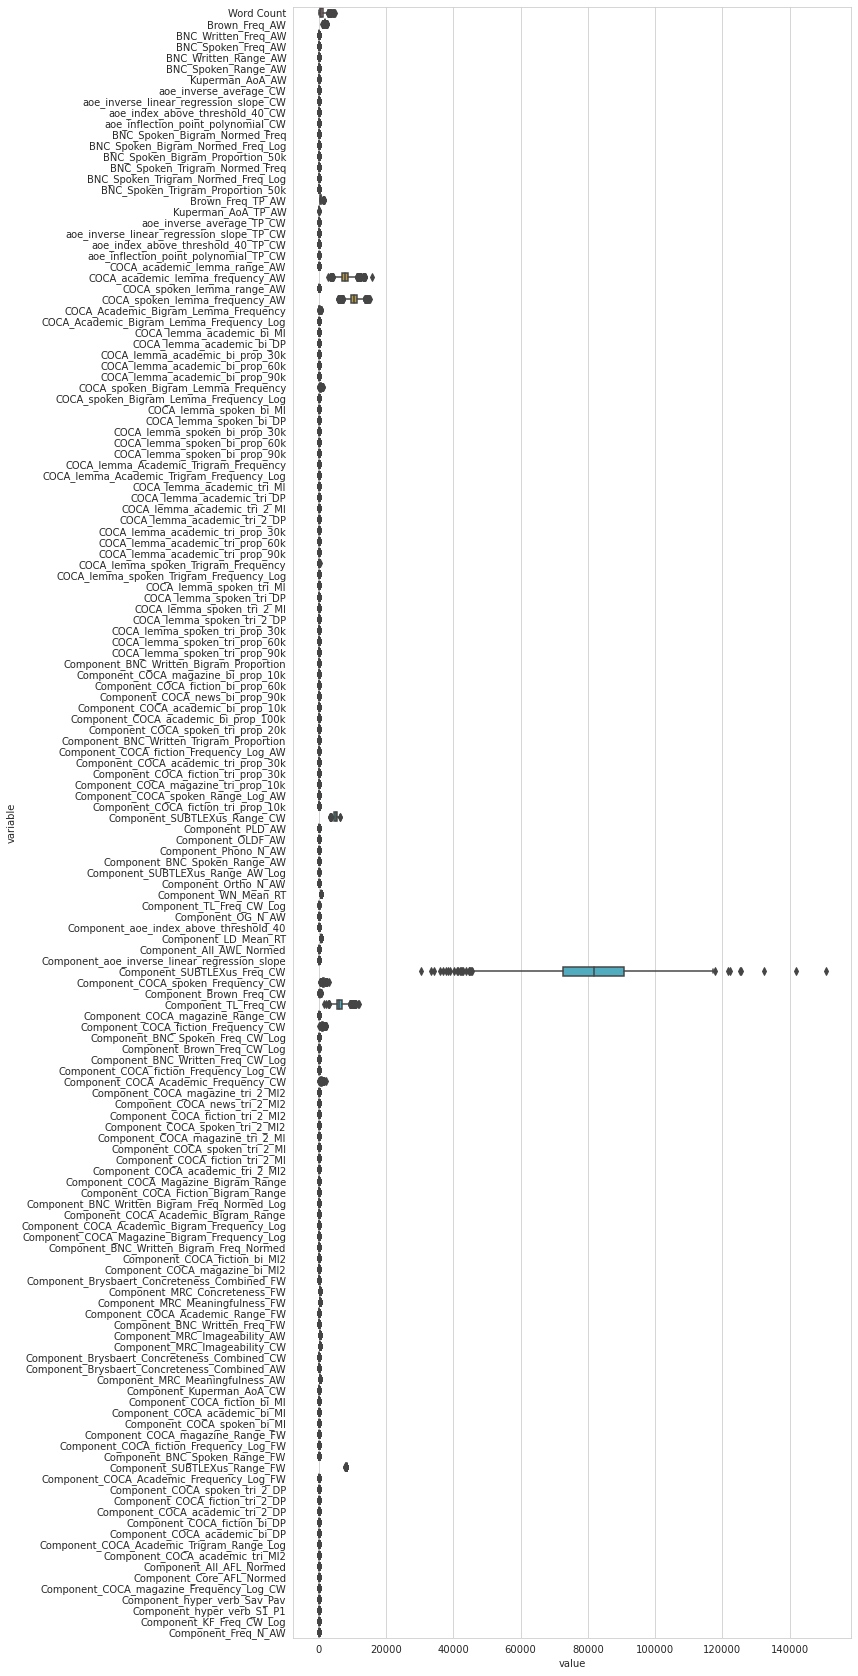

In [19]:
plt.figure(figsize=(10, 30))
sb.boxplot(x="value", y="variable", data=pd.melt(x))

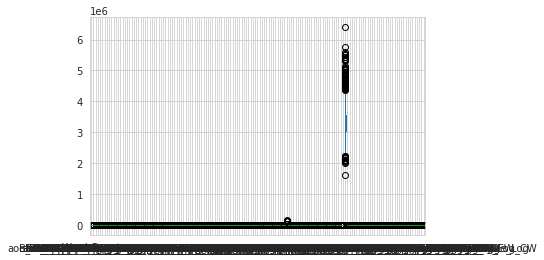

In [10]:
x.plot(kind='box')
plt.show()

In [17]:
len(df_syn_simp)

1782

In [18]:
len(df_syn_simp.drop(df_syn_simp[(df_syn_simp.idioma == "LO") | (df_syn_simp.idioma == "CA")]))

KeyError: "['filename' 'nwords' 'av_nominal_deps' 'av_nsubj_deps'\n 'av_nsubj_pass_deps' 'av_agents_deps' 'av_dobj_deps' 'av_pobj_deps'\n 'av_iobj_deps' 'av_ncomp_deps' 'av_nominal_deps_NN' 'av_nsubj_deps_NN'\n 'av_nsubj_pass_deps_NN' 'av_agents_deps_NN' 'av_dobj_deps_NN'\n 'av_pobj_deps_NN' 'av_iobj_deps_NN' 'av_ncomp_deps_NN'\n 'nominal_deps_stdev' 'nsubj_stdev' 'nsubj_pass_stdev' 'agents_stdev'\n 'dobj_stdev' 'pobj_stdev' 'iobj_stdev' 'ncomp_stdev'\n 'nominal_deps_NN_stdev' 'nsubj_NN_stdev' 'nsubj_pass_NN_stdev'\n 'agents_NN_stdev' 'dobj_NN_stdev' 'pobj_NN_stdev' 'iobj_NN_stdev'\n 'ncomp_NN_stdev' 'det_all_nominal_deps_struct'\n 'amod_all_nominal_deps_struct' 'prep_all_nominal_deps_struct'\n 'poss_all_nominal_deps_struct' 'vmod_all_nominal_deps_struct'\n 'nn_all_nominal_deps_struct' 'rcmod_all_nominal_deps_struct'\n 'advmod_all_nominal_deps_struct' 'conj_and_all_nominal_deps_struct'\n 'conj_or_all_nominal_deps_struct' 'det_all_nominal_deps_NN_struct'\n 'amod_all_nominal_deps_NN_struct' 'prep_all_nominal_deps_NN_struct'\n 'poss_all_nominal_deps_NN_struct' 'vmod_all_nominal_deps_NN_struct'\n 'nn_all_nominal_deps_NN_struct' 'rcmod_all_nominal_deps_NN_struct'\n 'advmod_all_nominal_deps_NN_struct' 'conj_and_all_nominal_deps_NN_struct'\n 'conj_or_all_nominal_deps_NN_struct' 'det_nsubj_deps_struct'\n 'amod_nsubj_deps_struct' 'prep_nsubj_deps_struct'\n 'poss_nsubj_deps_struct' 'vmod_nsubj_deps_struct' 'nn_nsubj_deps_struct'\n 'rcmod_nsubj_deps_struct' 'advmod_nsubj_deps_struct'\n 'conj_and_nsubj_deps_struct' 'conj_or_nsubj_deps_struct'\n 'det_nsubj_deps_NN_struct' 'amod_nsubj_deps_NN_struct'\n 'prep_nsubj_deps_NN_struct' 'poss_nsubj_deps_NN_struct'\n 'vmod_nsubj_deps_NN_struct' 'nn_nsubj_deps_NN_struct'\n 'rcmod_nsubj_deps_NN_struct' 'advmod_nsubj_deps_NN_struct'\n 'conj_and_nsubj_deps_NN_struct' 'conj_or_nsubj_deps_NN_struct'\n 'det_dobj_deps_struct' 'amod_dobj_deps_struct' 'prep_dobj_deps_struct'\n 'poss_dobj_deps_struct' 'vmod_dobj_deps_struct' 'nn_dobj_deps_struct'\n 'rcmod_dobj_deps_struct' 'advmod_dobj_deps_struct'\n 'conj_and_dobj_deps_struct' 'conj_or_dobj_deps_struct'\n 'det_dobj_deps_NN_struct' 'amod_dobj_deps_NN_struct'\n 'prep_dobj_deps_NN_struct' 'poss_dobj_deps_NN_struct'\n 'vmod_dobj_deps_NN_struct' 'nn_dobj_deps_NN_struct'\n 'rcmod_dobj_deps_NN_struct' 'advmod_dobj_deps_NN_struct'\n 'conj_and_dobj_deps_NN_struct' 'conj_or_dobj_deps_NN_struct'\n 'det_pobj_deps_struct' 'amod_pobj_deps_struct' 'prep_pobj_deps_struct'\n 'poss_pobj_deps_struct' 'vmod_pobj_deps_struct' 'nn_pobj_deps_struct'\n 'rcmod_pobj_deps_struct' 'advmod_pobj_deps_struct'\n 'conj_and_pobj_deps_struct' 'conj_or_pobj_deps_struct'\n 'det_pobj_deps_NN_struct' 'amod_pobj_deps_NN_struct'\n 'prep_pobj_deps_NN_struct' 'poss_pobj_deps_NN_struct'\n 'vmod_pobj_deps_NN_struct' 'nn_pobj_deps_NN_struct'\n 'rcmod_pobj_deps_NN_struct' 'advmod_pobj_deps_NN_struct'\n 'conj_and_pobj_deps_NN_struct' 'conj_or_pobj_deps_NN_struct'\n 'det_iobj_deps_struct' 'amod_iobj_deps_struct' 'prep_iobj_deps_struct'\n 'poss_iobj_deps_struct' 'vmod_iobj_deps_struct' 'nn_iobj_deps_struct'\n 'rcmod_iobj_deps_struct' 'advmod_iobj_deps_struct'\n 'conj_and_iobj_deps_struct' 'conj_or_iobj_deps_struct'\n 'det_iobj_deps_NN_struct' 'amod_iobj_deps_NN_struct'\n 'prep_iobj_deps_NN_struct' 'poss_iobj_deps_NN_struct'\n 'vmod_iobj_deps_NN_struct' 'nn_iobj_deps_NN_struct'\n 'rcmod_iobj_deps_NN_struct' 'advmod_iobj_deps_NN_struct'\n 'conj_and_iobj_deps_NN_struct' 'conj_or_iobj_deps_NN_struct' 'cl_av_deps'\n 'cl_ndeps_std_dev' 'acomp_per_cl' 'advcl_per_cl' 'agent_per_cl'\n 'cc_per_cl' 'ccomp_per_cl' 'conj_per_cl' 'csubj_per_cl'\n 'csubjpass_per_cl' 'dep_per_cl' 'discourse_per_cl' 'dobj_per_cl'\n 'expl_per_cl' 'iobj_per_cl' 'mark_per_cl' 'ncomp_per_cl' 'neg_per_cl'\n 'nsubj_per_cl' 'nsubjpass_per_cl' 'parataxis_per_cl' 'pcomp_per_cl'\n 'prep_per_cl' 'prepc_per_cl' 'prt_per_cl' 'tmod_per_cl' 'xcomp_per_cl'\n 'xsubj_per_cl' 'advmod_per_cl' 'aux_per_cl' 'auxpass_per_cl'\n 'modal_per_cl' 'acad_av_lemma_freq' 'acad_av_construction_freq'\n 'acad_av_lemma_construction_freq' 'acad_av_approx_collexeme'\n 'acad_av_faith_verb_cue' 'acad_av_faith_const_cue'\n 'acad_av_delta_p_verb_cue' 'acad_av_delta_p_const_cue'\n 'acad_av_lemma_freq_log' 'acad_av_construction_freq_log'\n 'acad_av_lemma_construction_freq_log' 'acad_av_lemma_freq_type'\n 'acad_av_construction_freq_type' 'acad_av_lemma_construction_freq_type'\n 'acad_av_approx_collexeme_type' 'acad_av_faith_verb_cue_type'\n 'acad_av_faith_const_cue_type' 'acad_av_delta_p_verb_cue_type'\n 'acad_av_delta_p_const_cue_type' 'acad_collexeme_ratio'\n 'acad_collexeme_ratio_type' 'acad_lemma_ttr' 'acad_construction_ttr'\n 'acad_lemma_construction_ttr' 'acad_lemma_attested'\n 'acad_construction_attested' 'acad_lemma_construction_attested'\n 'news_av_lemma_freq' 'news_av_construction_freq'\n 'news_av_lemma_construction_freq' 'news_av_approx_collexeme'\n 'news_av_faith_verb_cue' 'news_av_faith_const_cue'\n 'news_av_delta_p_verb_cue' 'news_av_delta_p_const_cue'\n 'news_av_lemma_freq_log' 'news_av_construction_freq_log'\n 'news_av_lemma_construction_freq_log' 'news_av_lemma_freq_type'\n 'news_av_construction_freq_type' 'news_av_lemma_construction_freq_type'\n 'news_av_approx_collexeme_type' 'news_av_faith_verb_cue_type'\n 'news_av_faith_const_cue_type' 'news_av_delta_p_verb_cue_type'\n 'news_av_delta_p_const_cue_type' 'news_collexeme_ratio'\n 'news_collexeme_ratio_type' 'news_lemma_ttr' 'news_construction_ttr'\n 'news_lemma_construction_ttr' 'news_lemma_attested'\n 'news_construction_attested' 'news_lemma_construction_attested'\n 'mag_av_lemma_freq' 'mag_av_construction_freq'\n 'mag_av_lemma_construction_freq' 'mag_av_approx_collexeme'\n 'mag_av_faith_verb_cue' 'mag_av_faith_const_cue'\n 'mag_av_delta_p_verb_cue' 'mag_av_delta_p_const_cue'\n 'mag_av_lemma_freq_log' 'mag_av_construction_freq_log'\n 'mag_av_lemma_construction_freq_log' 'mag_av_lemma_freq_type'\n 'mag_av_construction_freq_type' 'mag_av_lemma_construction_freq_type'\n 'mag_av_approx_collexeme_type' 'mag_av_faith_verb_cue_type'\n 'mag_av_faith_const_cue_type' 'mag_av_delta_p_verb_cue_type'\n 'mag_av_delta_p_const_cue_type' 'mag_collexeme_ratio'\n 'mag_collexeme_ratio_type' 'mag_lemma_ttr' 'mag_construction_ttr'\n 'mag_lemma_construction_ttr' 'mag_lemma_attested'\n 'mag_construction_attested' 'mag_lemma_construction_attested'\n 'fic_av_lemma_freq' 'fic_av_construction_freq'\n 'fic_av_lemma_construction_freq' 'fic_av_approx_collexeme'\n 'fic_av_faith_verb_cue' 'fic_av_faith_const_cue'\n 'fic_av_delta_p_verb_cue' 'fic_av_delta_p_const_cue'\n 'fic_av_lemma_freq_log' 'fic_av_construction_freq_log'\n 'fic_av_lemma_construction_freq_log' 'fic_av_lemma_freq_type'\n 'fic_av_construction_freq_type' 'fic_av_lemma_construction_freq_type'\n 'fic_av_approx_collexeme_type' 'fic_av_faith_verb_cue_type'\n 'fic_av_faith_const_cue_type' 'fic_av_delta_p_verb_cue_type'\n 'fic_av_delta_p_const_cue_type' 'fic_collexeme_ratio'\n 'fic_collexeme_ratio_type' 'fic_lemma_ttr' 'fic_construction_ttr'\n 'fic_lemma_construction_ttr' 'fic_lemma_attested'\n 'fic_construction_attested' 'fic_lemma_construction_attested'\n 'all_av_lemma_freq' 'all_av_construction_freq'\n 'all_av_lemma_construction_freq' 'all_av_approx_collexeme'\n 'all_av_faith_verb_cue' 'all_av_faith_const_cue'\n 'all_av_delta_p_verb_cue' 'all_av_delta_p_const_cue'\n 'all_av_lemma_freq_log' 'all_av_construction_freq_log'\n 'all_av_lemma_construction_freq_log' 'all_av_lemma_freq_type'\n 'all_av_construction_freq_type' 'all_av_lemma_construction_freq_type'\n 'all_av_approx_collexeme_type' 'all_av_faith_verb_cue_type'\n 'all_av_faith_const_cue_type' 'all_av_delta_p_verb_cue_type'\n 'all_av_delta_p_const_cue_type' 'all_collexeme_ratio'\n 'all_collexeme_ratio_type' 'all_lemma_ttr' 'all_construction_ttr'\n 'all_lemma_construction_ttr' 'all_lemma_attested'\n 'all_construction_attested' 'all_lemma_construction_attested'\n 'all_av_lemma_freq_stdev' 'all_av_construction_freq_stdev'\n 'all_av_lemma_construction_freq_stdev' 'all_av_approx_collexeme_stdev'\n 'all_av_faith_verb_cue_stdev' 'all_av_faith_const_cue_stdev'\n 'all_av_delta_p_verb_cue_stdev' 'all_av_delta_p_const_cue_stdev'\n 'acad_av_lemma_freq_stdev' 'acad_av_construction_freq_stdev'\n 'acad_av_lemma_construction_freq_stdev' 'acad_av_approx_collexeme_stdev'\n 'acad_av_faith_verb_cue_stdev' 'acad_av_faith_const_cue_stdev'\n 'acad_av_delta_p_verb_cue_stdev' 'acad_av_delta_p_const_cue_stdev'\n 'news_av_lemma_freq_stdev' 'news_av_construction_freq_stdev'\n 'news_av_lemma_construction_freq_stdev' 'news_av_approx_collexeme_stdev'\n 'news_av_faith_verb_cue_stdev' 'news_av_faith_const_cue_stdev'\n 'news_av_delta_p_verb_cue_stdev' 'news_av_delta_p_const_cue_stdev'\n 'mag_av_lemma_freq_stdev' 'mag_av_construction_freq_stdev'\n 'mag_av_lemma_construction_freq_stdev' 'mag_av_approx_collexeme_stdev'\n 'mag_av_faith_verb_cue_stdev' 'mag_av_faith_const_cue_stdev'\n 'mag_av_delta_p_verb_cue_stdev' 'mag_av_delta_p_const_cue_stdev'\n 'fic_av_lemma_freq_stdev' 'fic_av_construction_freq_stdev'\n 'fic_av_lemma_construction_freq_stdev' 'fic_av_approx_collexeme_stdev'\n 'fic_av_faith_verb_cue_stdev' 'fic_av_faith_const_cue_stdev'\n 'fic_av_delta_p_verb_cue_stdev' 'fic_av_delta_p_const_cue_stdev'\n 'all_av_lemma_freq_log_stdev' 'all_av_construction_freq_log_stdev'\n 'all_av_lemma_construction_freq_log_stdev' 'acad_av_lemma_freq_log_stdev'\n 'acad_av_construction_freq_log_stdev'\n 'acad_av_lemma_construction_freq_log_stdev'\n 'news_av_lemma_freq_log_stdev' 'news_av_construction_freq_log_stdev'\n 'news_av_lemma_construction_freq_log_stdev' 'mag_av_lemma_freq_log_stdev'\n 'mag_av_construction_freq_log_stdev'\n 'mag_av_lemma_construction_freq_log_stdev' 'fic_av_lemma_freq_log_stdev'\n 'fic_av_construction_freq_log_stdev'\n 'fic_av_lemma_construction_freq_log_stdev' 'idioma'] not found in axis"

In [ ]:
df_syn_simp = df_syn_simp.drop(df_syn_simp[(df_syn_simp.idioma == "LO") | (df_syn_simp.idioma == "CA")])

In [ ]:
df_synBueno_simp = df_syn_simp["idioma"].str[:2]
df_synBueno_comp = df_syn_comp["idioma"].str[:2]

In [4]:
df_lex_simp.shape, df_lex_comp.shape, df_syn_simp.shape, df_syn_comp.shape

((2136, 151), (2136, 14), (1782, 357), (1782, 11))

# Plot

In [45]:
def plot_all(df):
    for i, col in enumerate(df.drop(columns=["filename","idioma"]).columns):
        plt.figure(i, figsize=(9,2))
        sb.stripplot(x=col, y="idioma", data=df, alpha=.33)

In [53]:
#plot_all(df_lex_simp)

In [50]:
#plot_all(df_lex_comp)

In [51]:
#plot_all(df_syn_simp)

In [52]:
#plot_all(df_syn_comp)